In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [127]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score


In [31]:
# Cargar el dataset
ruta = r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 3 - Dataset Heart Disease Cleveland UCI\heart_cleveland_upload.csv"
Datos = pd.read_csv(ruta)

In [33]:
# Realizamos lectura de los Datos para el análisis exploratorio
Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [35]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


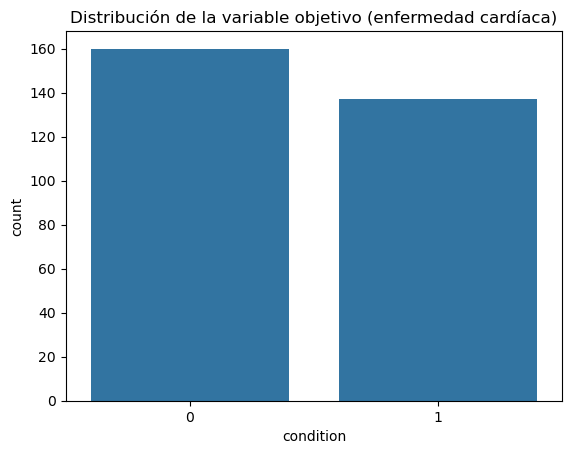

In [51]:
# Visualizar la distribución de las variables
sns.countplot(x='condition', data=df)
plt.title('Distribución de la variable objetivo (enfermedad cardíaca)')
plt.show()

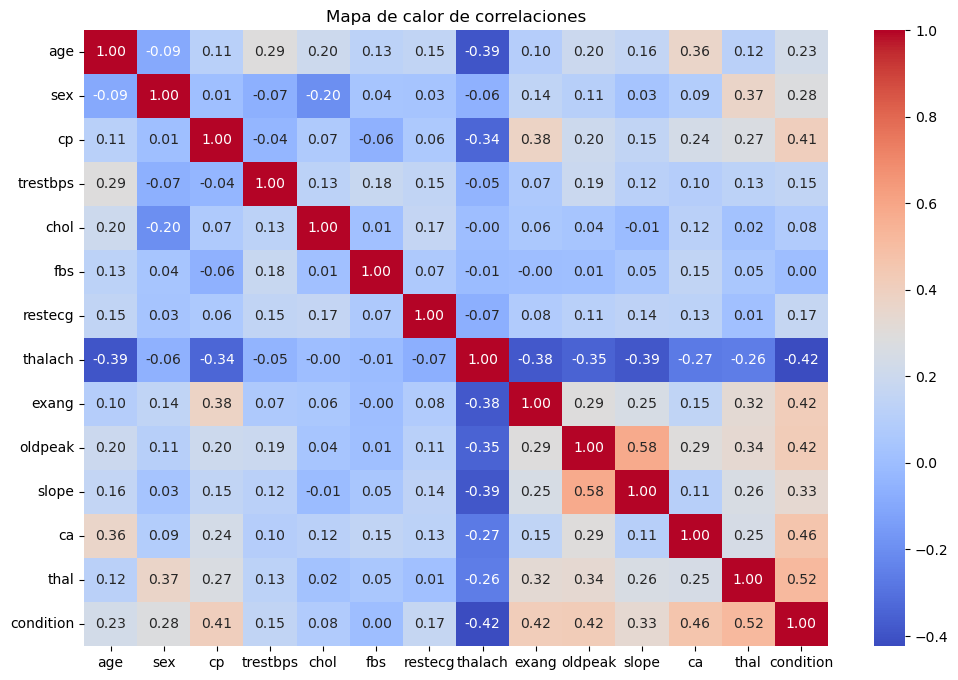

In [53]:
# Visualizar la correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [55]:
# Preprocesamiento de Datos
# Verificar si hay valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [77]:
# Total de personas con enfermedad cardiaca 
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [79]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [111]:
# División del Dataset en Train y Test
X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state= 40)

In [103]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
14    56    1   0       120   193    0        2      162      0      1.9   
239   55    1   3       140   217    0        0      111      1      5.6   
177   64    1   3       128   263    0        0      105      1      0.2   
135   46    0   2       142   177    0        2      160      1      1.4   
144   42    1   2       120   240    1        0      194      0      0.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
48    52    1   1       128   205    1        0      184      0      0.0   
225   57    1   3       165   289    1        2      124      0      1.0   
243   55    0   3       128   205    0        1      130      1      2.0   
165   67    0   3       106   223    0        0      142      0      0.3   
104   57    1   2       150   168    0        0      174      0      1.6   

     slope  ca  thal  
14       1   0     2  
239      2   0     2  
177      1   1    

In [109]:
print (Y_train)

14     0
239    1
177    0
135    0
144    0
      ..
48     0
225    1
243    1
165    0
104    0
Name: condition, Length: 237, dtype: int64


In [131]:
# Entrenar el modelo de regresión logística
# Construir el modelo de regresión logística 
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   
# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [113]:
print (Y_test)

65     0
13     0
271    0
160    1
94     0
121    0
106    1
249    0
20     0
201    1
129    1
52     1
184    1
27     0
99     0
131    0
273    1
71     0
217    1
32     1
279    1
222    1
9      0
138    0
255    1
193    1
116    0
96     1
221    1
17     0
18     1
194    1
26     1
257    1
258    1
262    1
190    1
57     0
109    0
136    1
44     0
214    1
213    1
270    1
148    0
46     0
124    0
101    0
207    0
36     0
66     0
142    0
151    0
275    0
79     0
60     0
120    0
281    1
163    1
95     0
Name: condition, dtype: int64


In [119]:
print (Prediccion)

[0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]


In [121]:
# Evaluar el desempeño del modelo
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.76      0.68      0.72        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [129]:
# Métricas de evaluación
print("\nMatriz de Confusión:")
print(confusion_matrix(Y_test,Prediccion))

print("\nReporte de Clasificación:")
print(classification_report(Y_test,Prediccion))

print(f"Precisión del Modelo: {accuracy_score(Y_test,Prediccion):.2f}")


Matriz de Confusión:
[[26  6]
 [ 9 19]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.76      0.68      0.72        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60

Precisión del Modelo: 0.75


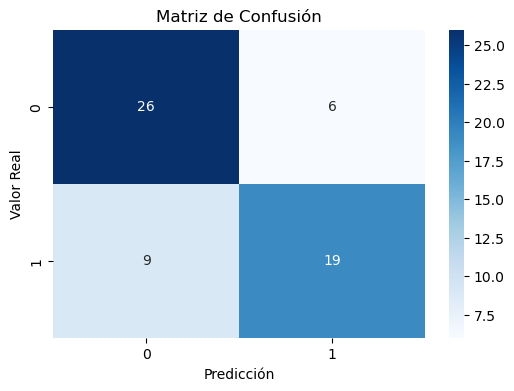

In [133]:
# 8. Visualización de Resultados
# Matriz de confusión visual
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test,Prediccion), annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

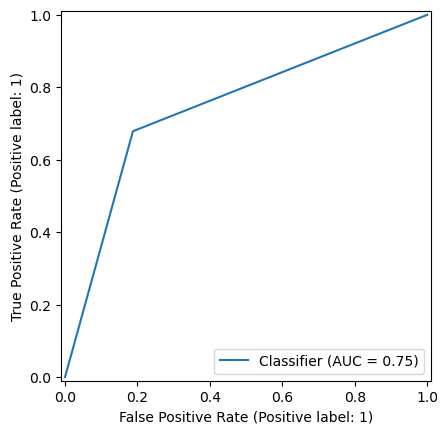

In [135]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

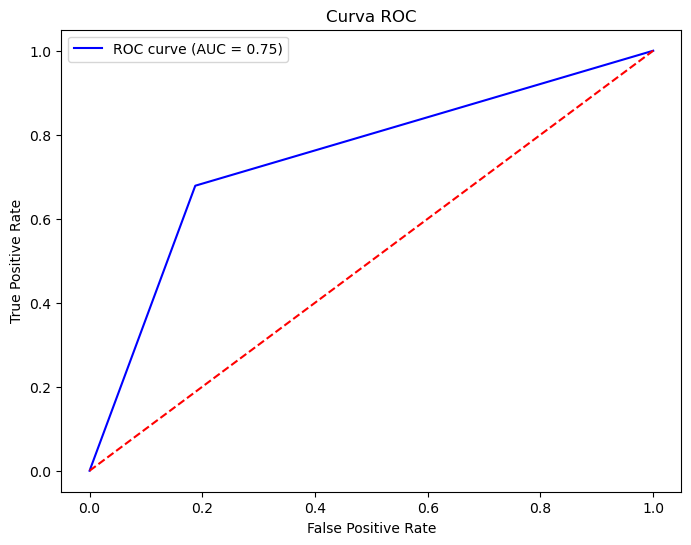

In [141]:
# Curva ROC
fpr, tpr, _ = roc_curve(Y_test, Prediccion)
auc = roc_auc_score(Y_test, Prediccion)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()